# Magic Gamma 

dataset=Magic gamma data classifying gamma particles and hadrons particles


## Data Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3long','fM3Trans','fAlpha','fDist','class']
df=pd.read_csv("/home/premnath/Desktop/Hi...!!/ML/datasets/numerical/magic_GAMMA/magic04.data",names=cols)
df['class']=(df['class']=='g').astype(int)
df['class'].unique() 
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


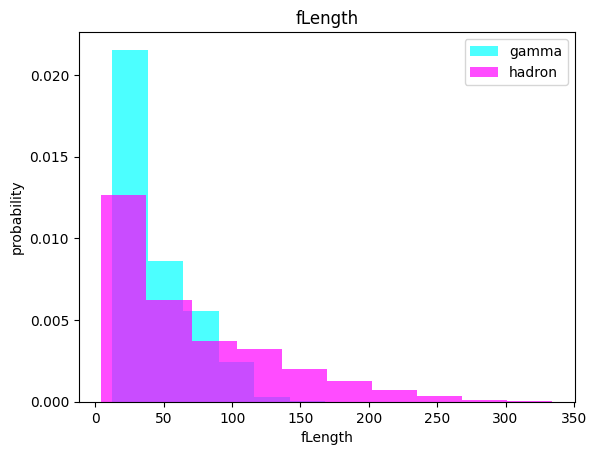

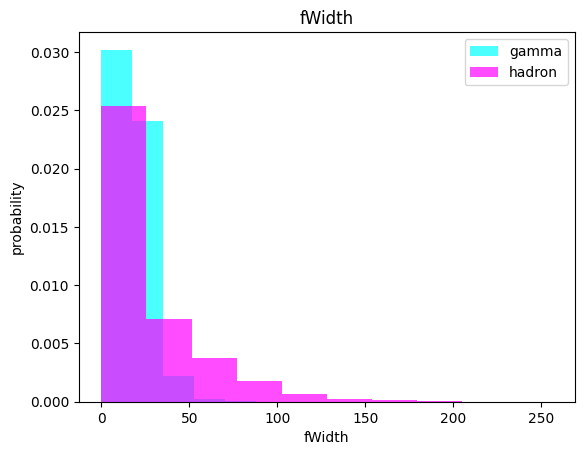

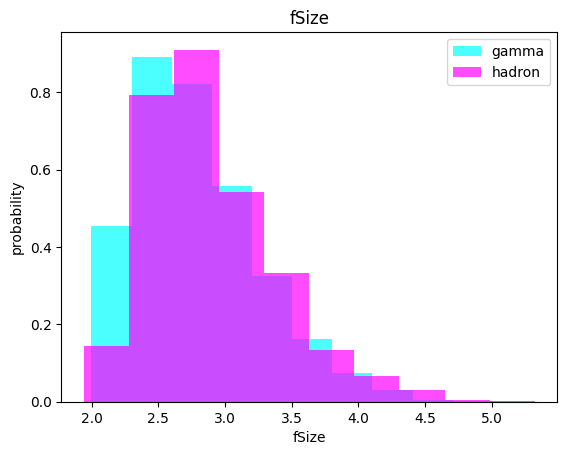

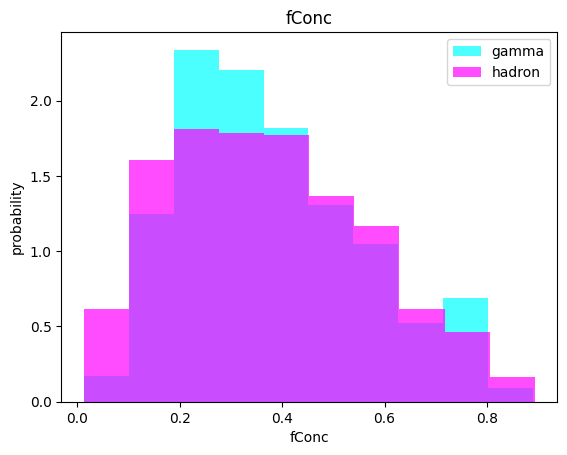

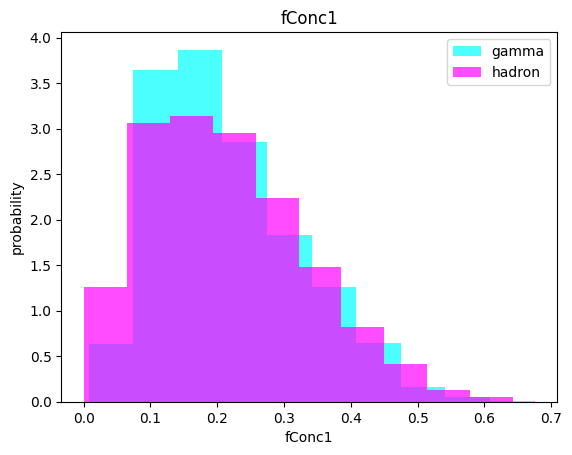

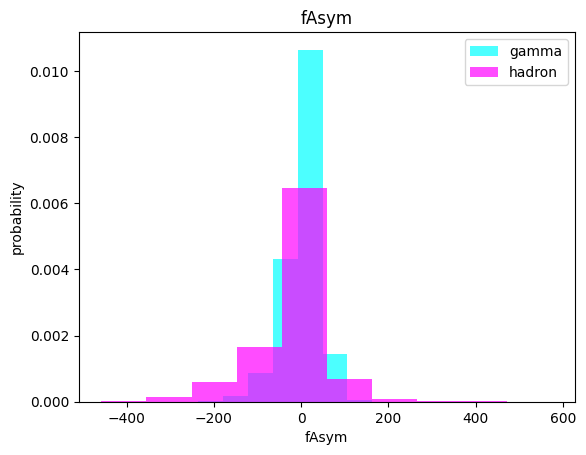

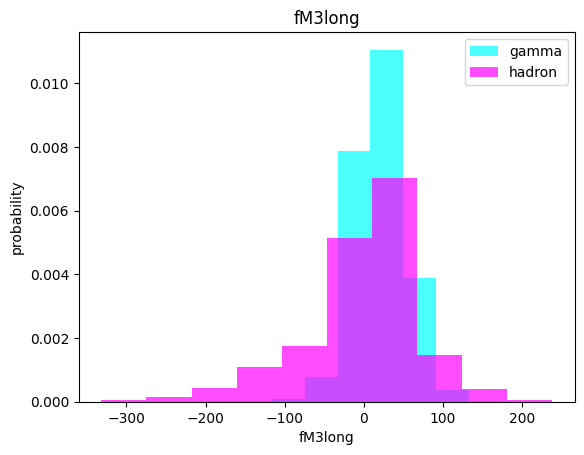

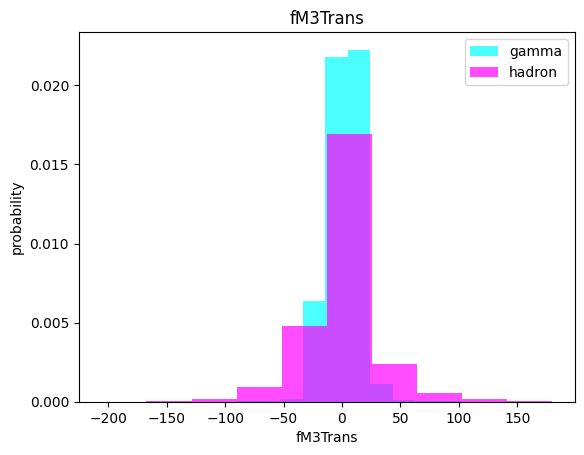

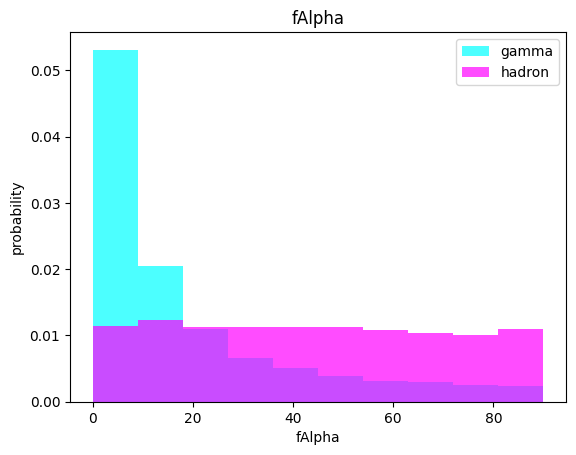

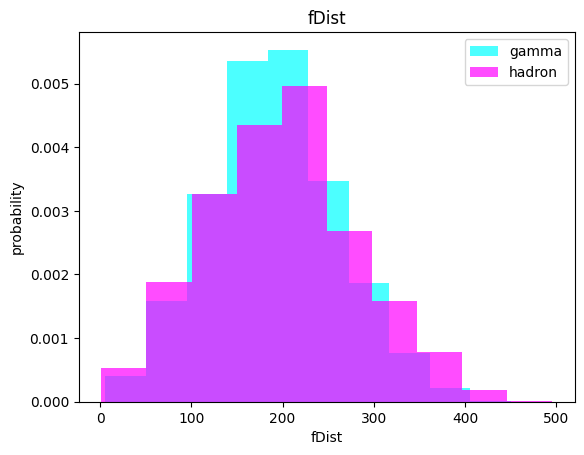

In [4]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label], color='aqua', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class']==0][label], color='magenta', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()


In [8]:
train, valid, test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/home/premnath/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
df.size

209220

### Over Sampling

In [10]:
def scale_dataset(dataframe,oversample=False):
    x=dataframe[dataframe.columns[:-1]].values
    y=dataframe[dataframe.columns[-1]].values
    scaler=StandardScaler()
    X=scaler.fit_transform(x)
   # print(X,'\n')
    if oversample:
        ros=RandomOverSampler()
        X,y=ros.fit_resample(x,y)
        #print(X,'\n',y,'\n')
    data=np.hstack((X,np.reshape(y,(-1,1))))
    return data,X,y


In [11]:
Train,XTrain,YTrain=scale_dataset(train,oversample=True)
Valid,XValid,YValid=scale_dataset(valid,oversample=False)
Test,XTest,YTest=scale_dataset(test,oversample=False)


In [12]:
sum(YTrain==1)

7348

In [13]:
sum(YTrain==0)

7348

# kNN


In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(XTrain,YTrain)


KNeighborsClassifier(n_neighbors=3)

In [16]:
YPred=knn_model.predict(XTest)

In [17]:
YPred

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(YTest,YPred,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1312
           1       0.66      1.00      0.79      2492

    accuracy                           0.66      3804
   macro avg       0.33      0.50      0.40      3804
weighted avg       0.43      0.66      0.52      3804



In [20]:
prediction=knn_model.predict(XValid)

In [21]:
print(classification_report(YValid,prediction,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1312
           1       0.66      1.00      0.79      2492

    accuracy                           0.66      3804
   macro avg       0.33      0.50      0.40      3804
weighted avg       0.43      0.66      0.52      3804

